# Importing Libraries

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importing Dataset

In [8]:
toyota_data=pd.read_csv('ToyotaCorolla.csv')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [9]:
#pd.set_option('max_columns',None)

# Initial Analysis

In [4]:
toyota_data.shape

(1436, 38)

In [5]:
toyota_data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
toyota_data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [10]:
toyota_data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating New DataFrame 
##### Considering ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight") Columns according to the client's requirement

In [13]:
toyota_data=toyota_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
#### According to our initial analysis on given data we do not found any uncleaned data so we don't need for Data Preparation

# Checking for Assumptions
### Here we have multiple features so we cannot make scatter plot for each feature ,so we proceed for pairplot

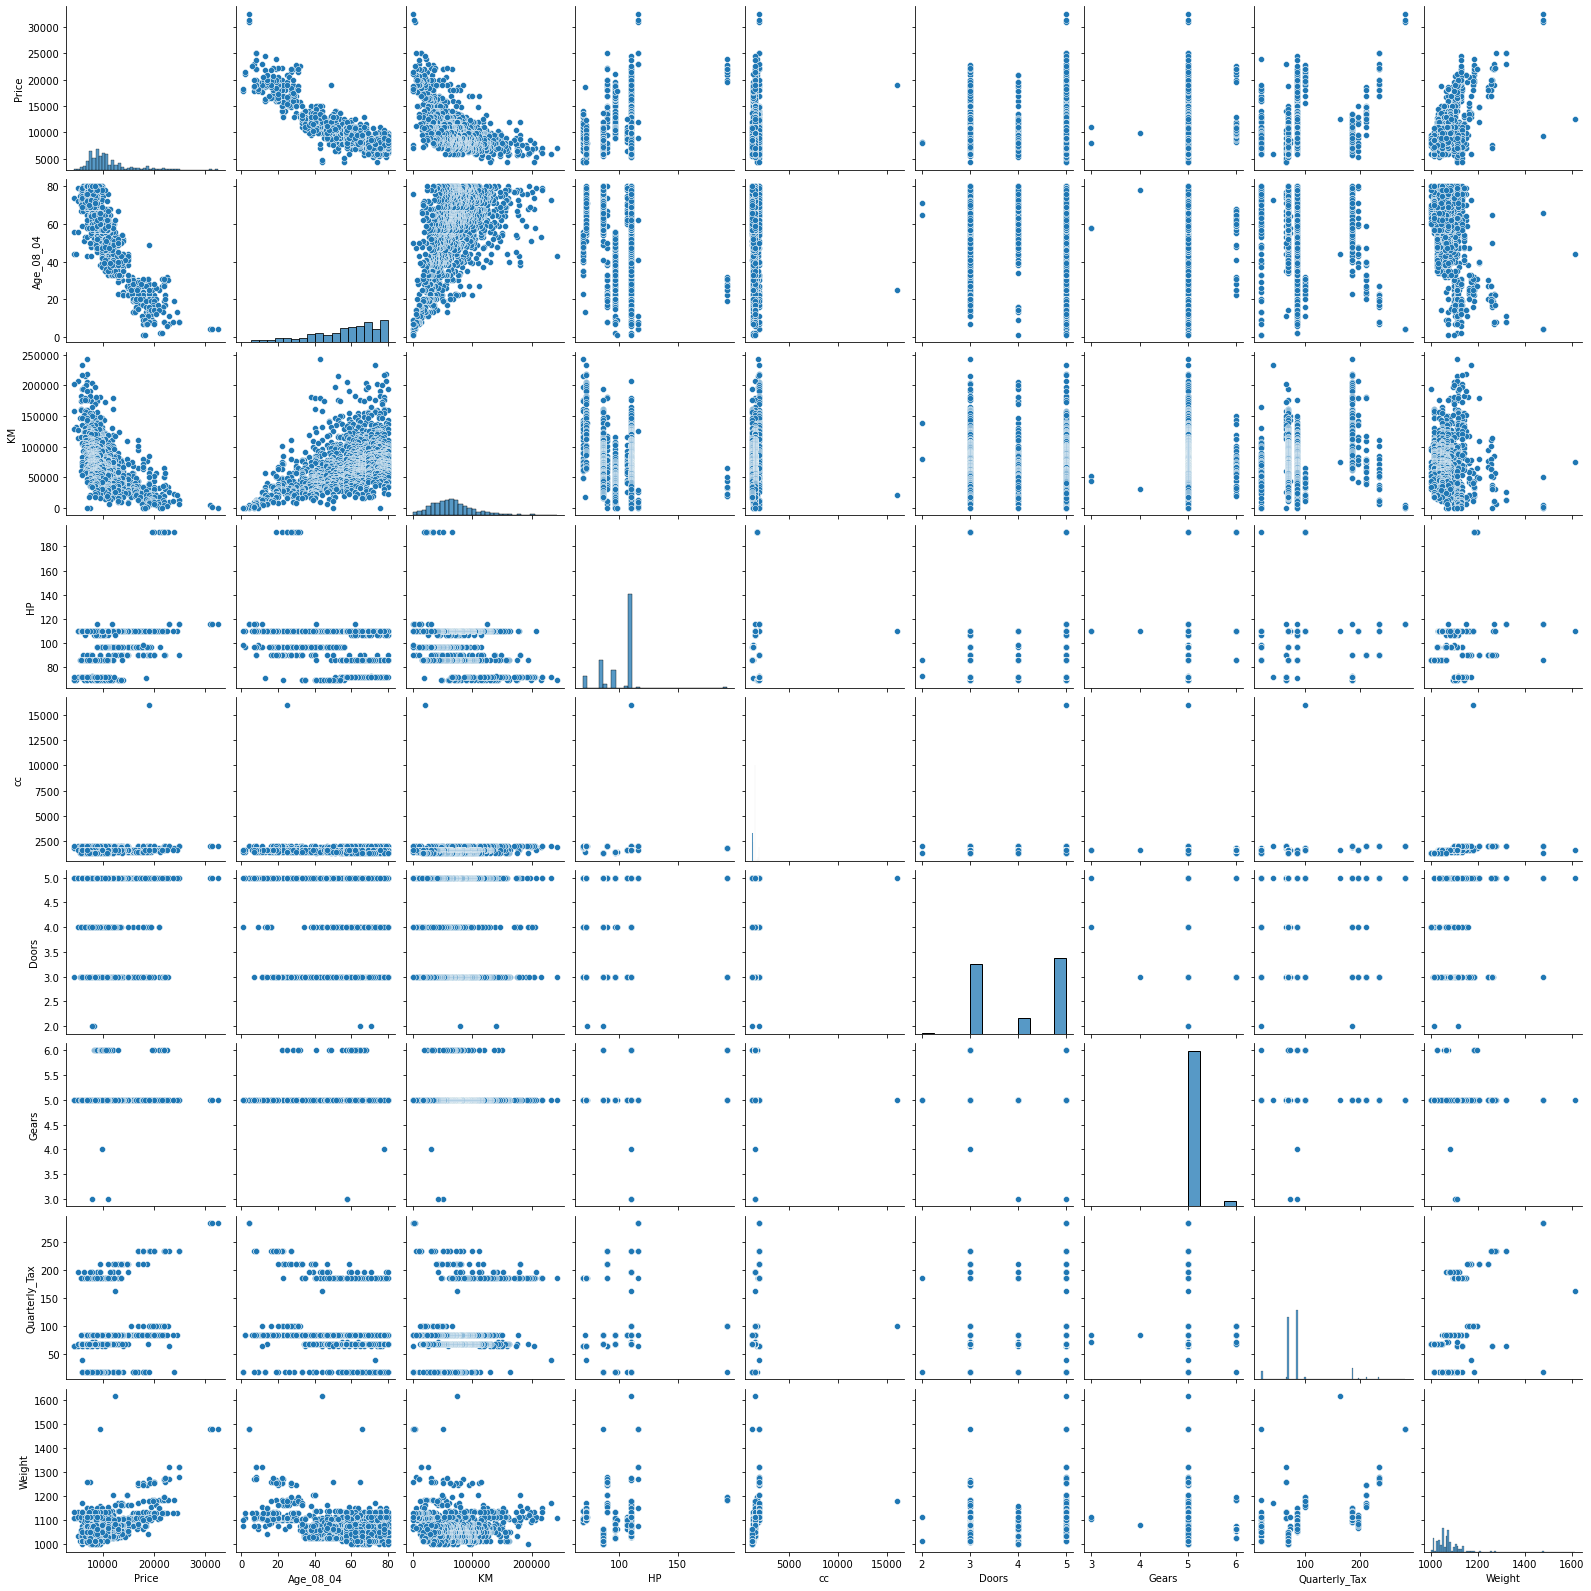

In [18]:
sns.pairplot(toyota_data)

In [19]:
# checking for correlaton
toyota_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [20]:
# Checking VIF score for corelation
import numpy as np

In [21]:
x= np.array(toyota_data[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif=[variance_inflation_factor(x,i) for i in range (x.shape[1])]
print(vif)

[16.392683588571323, 7.590522393363044, 64.89496020816397, 17.19974980505927, 21.874692138630017, 438.6318041941506, 11.020073549837228, 543.1330758695781]


In [22]:
# Here with pairplot we can see that our data is not linear in nature and also some of oue input feature is showing higher colinearity
# i.e. our assumption is not perfectly matched...

# Model Building

In [24]:
x = toyota_data.loc[:,'Age_08_04':'Weight']
y= toyota_data['Price']


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [30]:
x_train.shape

(1148, 8)

In [31]:
y_train.shape

(1148,)

In [26]:
lr=LinearRegression()

# Model Training

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

# Model Testing

In [69]:
y_pred=lr.predict(x_test)

# Model Evaluation
#### To check my model's acuuracy and error

In [70]:
from sklearn.metrics import mean_squared_error,r2_score

In [71]:
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2Score :',r2_score(y_test,y_pred))

MSE : 5664560.078922718
R2Score : 0.5978784673802038


In [45]:
######Test Accuracy
######MSE : 5664560.078922718
######R2Score : 0.5978784673802038

#####Training Accuracy 
######MSE : 1769535.0111743144
######R2Score : 0.862919510084779
#### Our data is not matching the assumptions as we mentioned above so we are not getting
##### a best accuracy value let's do model optimization for better predictions

# Model Optimization

In [46]:
import statsmodels.formula.api as smf

In [50]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()

In [51]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [52]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [53]:
# Let's construct multiple models and check for accuracy

In [54]:
model_2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota_data).fit()

In [55]:
model_2.pvalues

Intercept         9.525329e-03
Age_08_04        1.110399e-287
KM                1.744785e-55
HP                4.147049e-33
cc                1.661716e-01
Doors             5.334699e-01
Quarterly_Tax     1.717209e-03
Weight            2.649788e-52
dtype: float64

In [57]:
model_3=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()

In [58]:
model_3.pvalues

Intercept         8.061841e-05
Age_08_04        2.111306e-288
KM                6.123589e-57
HP                2.762121e-28
cc                1.790917e-01
Gears             2.103732e-03
Quarterly_Tax     2.512611e-03
Weight            1.612185e-55
dtype: float64

In [61]:
model_4=smf.ols('Price~HP+cc+Quarterly_Tax+Weight',data=toyota_data).fit()

In [62]:
model_4.pvalues

Intercept        8.647628e-97
HP               1.354322e-23
cc               1.499799e-03
Quarterly_Tax    1.968525e-03
Weight           1.059615e-97
dtype: float64

In [63]:
# Checking my optimized model accuracy by evaluation metrics

In [64]:
model.aic,model.rsquared

(24769.07664007625, 0.8637627463428192)

In [65]:
model_2.aic,model_2.rsquared

(24776.201256363627, 0.8628943128267853)

In [66]:
model_3.aic,model_3.rsquared

(24767.07828337284, 0.8637625904386812)

In [67]:
model_4.aic,model_4.rsquared

(26848.857761762556, 0.41694329077511716)

In [68]:
###### Here we see that our model_3 is predicting more accurate than other models but it is not so good because our data is not 
###### matching the assumtions very well so we need more data to make a best model or we can get only 86% of accuracy with Linear regressin Model.